# SMOTE(Synthetic Minority Over-Sampling Technique ):
A dataset is imbalanced if the classes are not equally represented in a classification dataset.Especially in fraud detection. 1 out of 100s of transaction might be a fraud. Hence to tackle this issue we are using SMOTE to oversample the minority data( ie. Fraud transactions).

SMOTE is an Oversampling technique that allows us to generate synthetic samples for our minority categories. The idea is based on the K-Nearest Neighbors algorithm. 

# Table of contents

1. Setup:
  * Import relavent libraries
  * Read the CSV file
  * Undertand the characteristics of the df
  * Drop Duplicates
  * Visulization tools to understand the imbalance of classes
  * Correlation plot
  * Split the data into train and test set
  * Scale the data using Standard Scaler
  * SMOTE to oversample the minority class
  * randomunder sampler to undersample the majority class
  * **Random Forest for binary classification**
   * Precision, recall, accuracy f1 score, roc-auc curve, precision recall curve
  * **Logistic regression for classification**
   * Precision, recall, accuracy f1 score, roc-auc curve, precision recall curve

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
#import the df
raw_df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

# EDA

In [3]:
raw_df.shape

(284807, 31)

In [4]:
raw_df.info()
#looks like no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#no missing data
raw_df.isnull().sum().sum()

0

In [6]:
raw_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
#drop duplicate value
raw_df.drop_duplicates(inplace=True)
raw_df.shape

(283726, 31)

In [8]:
px.pie(values=raw_df['Class'].value_counts(), names=['Genuine','Fraud'] ,
       width=500, height=300, color_discrete_sequence=["green","Red"],
       title="Genuine vs Fraud transactions")

0    283253
1       473
Name: Class, dtype: int64


<AxesSubplot:xlabel='Class', ylabel='count'>

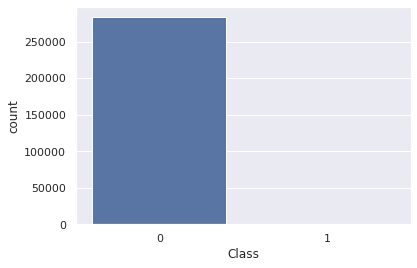

In [9]:
print(raw_df.Class.value_counts())
sns.countplot(x='Class',data=raw_df)

In [10]:
#percentage of fraud transactions 
(raw_df.Class.value_counts(1).to_list()[1])*100

0.1667101358352777

In [11]:
#correlation matrix
fig = px.imshow(raw_df.corr(),x=list(raw_df.corr().columns),
                y=list(raw_df.corr().columns),width=800, height=600)
fig.show()

In [12]:
#since time is not relevant to our classification model we will drop it
raw_df.drop('Time',axis=1,inplace=True)

In [13]:
df=raw_df.copy()

In [14]:
#split the data into train and test 
X=df.drop('Class',axis=1)
y=df['Class']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size = 0.3, random_state = 42)

# Model

In [16]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [17]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
# from sklearn.tree import DecisionTreeClassifier

# model = DecisionTreeClassifier()
over = SMOTE()
under = RandomUnderSampler()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train_new, y_train_new = pipeline.fit_resample(X_train_scaled, y_train)

In [18]:
y_train_new.value_counts()
#Data has been balanced from both the classes

0    198277
1    198277
Name: Class, dtype: int64

# Random Forests

In [19]:
from sklearn.ensemble import RandomForestClassifier
model1= RandomForestClassifier()
model1=model1.fit(X_train_new,y_train_new)

In [20]:
y_pred = model1.predict(X_test_scaled)

# Metrics

In [21]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

cm = confusion_matrix(y_test, y_pred)

Recall = recall_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred)
Accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[84966    10]
 [   35   107]]


In [22]:
ndf = [(Recall, Precision, F1, Accuracy)]

score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
score.insert(0, 'Models', 'Random Forrests ')
score

,Models,Recall,Precision,F1 Score,Accuracy
0,Random Forrests,0.753521,0.91453,0.826255,0.999471


In [23]:
from sklearn.metrics import roc_auc_score
ROCAUCscore = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC Curve for SMOTE-Tomek: {ROCAUCscore:.4f}")

AUC-ROC Curve for SMOTE-Tomek: 0.8767


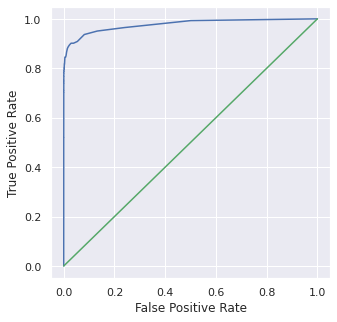

In [24]:
y_proba = model1.predict_proba(X_test)

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_auc_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods - Good plot
plot_auc_roc_curve(y_test, y_proba[:, 1])

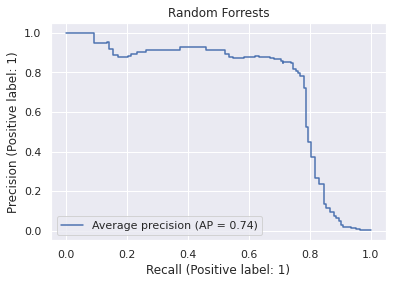

In [25]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(model1, X_test, y_test, name="Average precision")
_ = display.ax_.set_title("Random Forrests")

# Logistic Regresion

In [26]:
from sklearn.linear_model import LogisticRegression
model2= LogisticRegression()
model2=model2.fit(X_train_new,y_train_new)
y_pred = model2.predict(X_test_scaled)

In [27]:
cm = confusion_matrix(y_test, y_pred)

Recall = recall_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred)
Accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[82578  2398]
 [   17   125]]


In [28]:
ndf = [(Recall, Precision, F1, Accuracy)]

score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
score.insert(0, 'Models', 'Logistic Regression ')
score

,Models,Recall,Precision,F1 Score,Accuracy
0,Logistic Regression,0.880282,0.049544,0.093809,0.971628


In [29]:
ROCAUCscore = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC Curve for SMOTE-Tomek: {ROCAUCscore:.4f}")

AUC-ROC Curve for SMOTE-Tomek: 0.9260


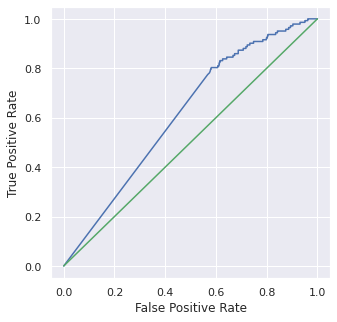

In [30]:
y_proba = model2.predict_proba(X_test)
# Plots the ROC curve using the sklearn methods - Good plot
plot_auc_roc_curve(y_test, y_proba[:, 1])

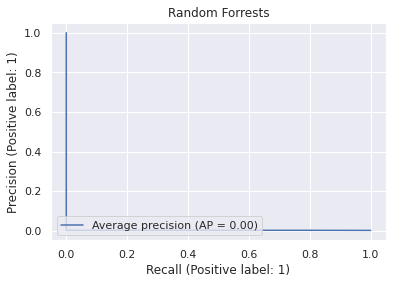

In [31]:
display = PrecisionRecallDisplay.from_estimator(model2, X_test, y_test, name="Average precision")
_ = display.ax_.set_title("Random Forrests")

# Conclusion

Random forests was a better model to predict Credit card fraud compared to logistic regression.